# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

'year' is numerieke continue data. Met jaartallen kunnen wiskundige bewerkingen worden uitgevoerd, bovendien kan een jaartal elk mogelijk jaar zijn. 

'fuel type' is categorische data van het niet ordinale type. Er is geen volgorde of hierarchische onderverdeling bij deze data, het is louter beschrijvend. 

'seller_rating' is nummerieke discrete data. Het is een numerieke waarde gelimiteerd tussen 1 en 5.   


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [1]:
import os
import pandas as pd


In [2]:
df = pd.read_csv("../../data/Cars/cars.csv")
# df.describe()
# df

# Filter het DataFrame op Volvo
df_volvo = df[df['manufacturer'] == 'Volvo']
# print(df_volvo)
# Bereken de gemiddelde prijs van de Volvo's
mean_price = round(df_volvo['price'].mean())

print(f"De gemiddelde prijs van een Volvo is: {mean_price}")

# De auto met de prijs het dichts bij de gemiddelde prijs is 
index_nearest_to_mean = (df_volvo['price'] - mean_price).abs().idxmin()

print(f"\n \nDe Volvo met een gemiddelde tweedehands prijs ziet er als volgt uit: \n\n{df_volvo.loc[index_nearest_to_mean]}")

De gemiddelde prijs van een Volvo is: 35800

 
De Volvo met een gemiddelde tweedehands prijs ziet er als volgt uit: 

manufacturer                             Volvo
model                         XC40 T4 Momentum
year                                      2021
mileage                                20089.0
engine                                 I-4 cyl
transmission                               NaN
drivetrain                   Front-wheel Drive
fuel_type                             Gasoline
mpg                                        NaN
exterior_color                     Black Stone
interior_color                             NaN
accidents_or_damage                        0.0
one_owner                                  1.0
personal_use_only                          0.0
seller_name            Volvo Cars of Nashville
seller_rating                              NaN
driver_rating                              4.7
driver_reviews_num                        35.0
price_drop                          

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import plot_style 
from scipy import stats

plot_style.standard_setup()


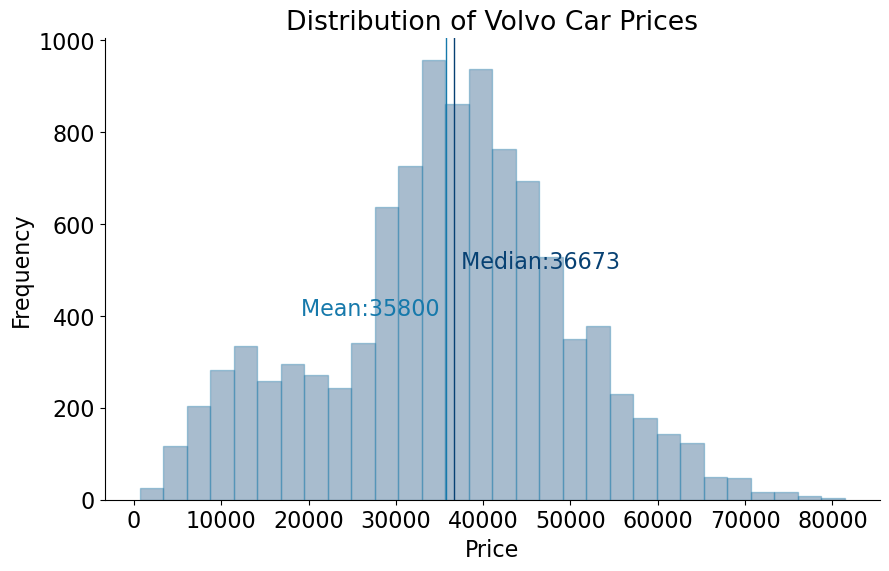

De prijsklasse van 2de hands Volvo-auto's in de dataset varieert van 695.0 tot 81400.0.


In [4]:
# load standard plot values and colors
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of Volvo cars with pre defined colors in plot_style.py
ax.hist(df_volvo['price'], bins=30,  color=plot_style.hist_color, edgecolor=plot_style.hist_edgecolor, alpha=0.35)

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color=plot_style.median_color,  linewidth=1, label=f'Median: {median_price}')
ax.axvline(mean_price, color=plot_style.mean_color, linewidth=1, label=f'Mean: {mean_price}')

# Add labels for the median and mean prices
ax.text((median_price), ax.get_ylim()[1]*0.5, f' Median:{round(median_price)}', color=plot_style.median_color, ha='left')
ax.text((mean_price), ax.get_ylim()[1]*0.4, f'Mean:{round(mean_price)} ', color=plot_style.mean_color, ha='right')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

# Calculate the minimum and maximum prices
min_price = df_volvo['price'].min()
max_price = df_volvo['price'].max()

# Print the range of prices
print(f'De prijsklasse van 2de hands Volvo-auto\'s in de dataset varieert van {min_price} tot {max_price}.')

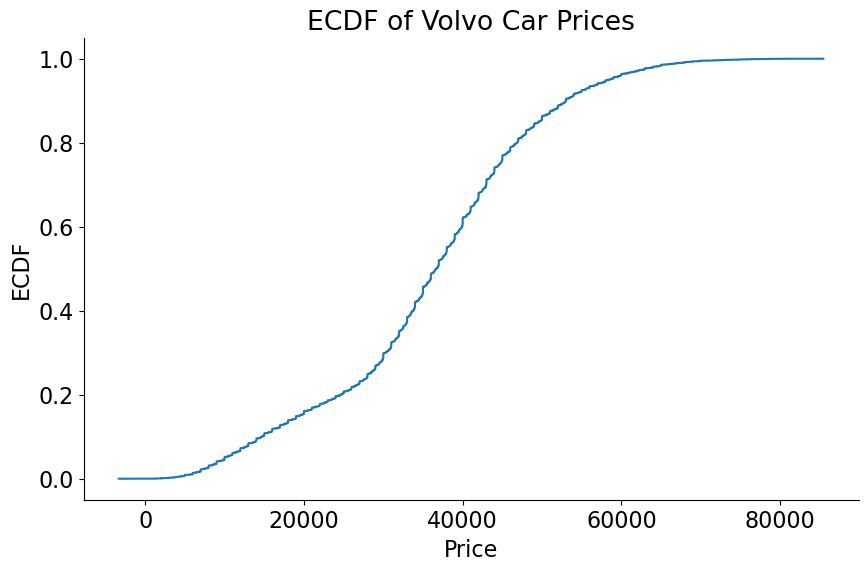

In [5]:
# Print Ecd met stats.ecdf

res = stats.ecdf(df_volvo['price'])

fig, ax = plt.subplots()
res.cdf.plot(ax)

ax.set_title('ECDF of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('ECDF')
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?


['Hybrid' 'Plug-In Hybrid' 'Gasoline' 'Gasoline Fuel' 'Premium Unleaded'
 'Gasoline/Mild Electric Hybrid' 'Regular Unleaded' 'Electric'
 'Hybrid Fuel' 'G' 'Plug-In Electric/Gas' 'Gas']


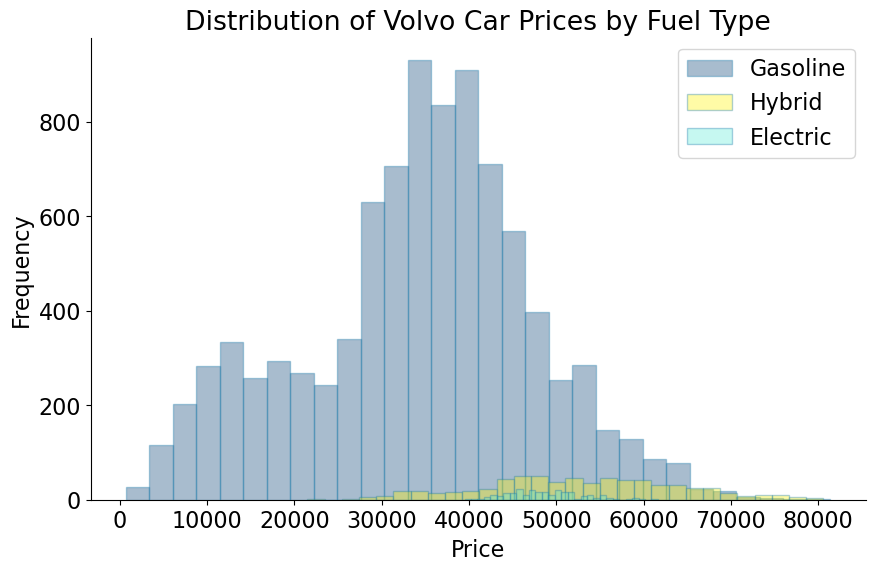

In [40]:
# Even kijken welke unieke values in fuel_type zitten, en deze dan toewijzen aan de 3 categorieen.
# print(df_volvo['fuel_type'].unique())

# Define the categories
electric = ['Electric']
hybrid = ['Hybrid', 'Plugin Hybrid',"Plug-In Hybrid",'Gasoline/Mild Electric Hybrid', 'Hybrid Fuel', 'Plug-In Electric/Gas']
gasoline = ['Gasoline',"Gas", 'Gasoline Fuel', 'Premium Unleaded', 'Regular Unleaded', 'G']

# Remove rows with NaN in 'fuel_type_3cat'
df_volvo = df_volvo.dropna(subset=['fuel_type_3cat'])

# Categorize the 'fuel_type' column
df_volvo.loc[:, 'fuel_type_3cat'] = df_volvo['fuel_type'].apply(lambda x: 'Electric' if x in electric else ('Hybrid' if x in hybrid else ('Gasoline' if x in gasoline else x)))

# print(df_volvo['fuel_type'].unique())

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of gasoline Volvo cars with red bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Gasoline']['price'], bins=30, color=plot_style.hist_color, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Gasoline')


# Plot a histogram of the prices of Hybrid Volvo cars with yellow bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Hybrid']['price'], bins=30, color=plot_style.hist_color3, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Hybrid')

# Plot a histogram of the prices of electric Volvo cars with blue bars
ax.hist(df_volvo[df_volvo['fuel_type_3cat'] == 'Electric']['price'], bins=30, color=plot_style.hist_color2, edgecolor=plot_style.hist_edgecolor, alpha=0.35, label='Electric')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices by Fuel Type')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend()

# Display the plot
plt.show()

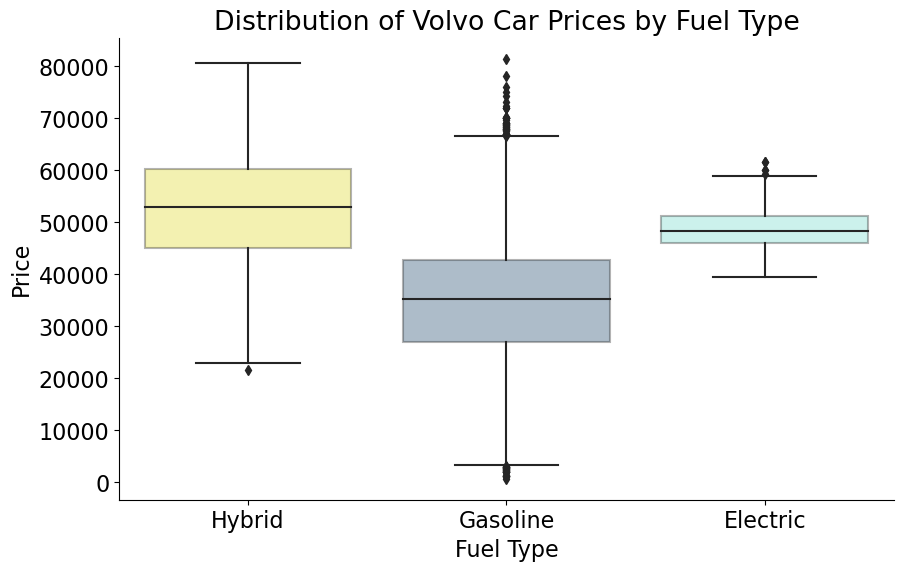

In [41]:
# Create a boxplot of the prices by fuel type
# Define a dictionary mapping fuel types to colors
# Define a dictionary mapping fuel types to colors
color_dict = {'Electric': plot_style.hist_color2, 'Hybrid': plot_style.hist_color3, 'Gasoline': plot_style.hist_color}

# Create a boxplot of the prices by fuel type
sns.boxplot(x='fuel_type_3cat', y='price', data=df_volvo, palette=color_dict,boxprops=dict(alpha=.35))


# Set the title and labels
plt.title('Distribution of Volvo Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# Display the plot
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

['Hybrid' 'Plug-In Hybrid' 'Gasoline' 'Gasoline Fuel' 'Premium Unleaded'
 'Gasoline/Mild Electric Hybrid' 'Regular Unleaded' 'Electric'
 'Hybrid Fuel' 'G' 'Plug-In Electric/Gas' 'Gas']


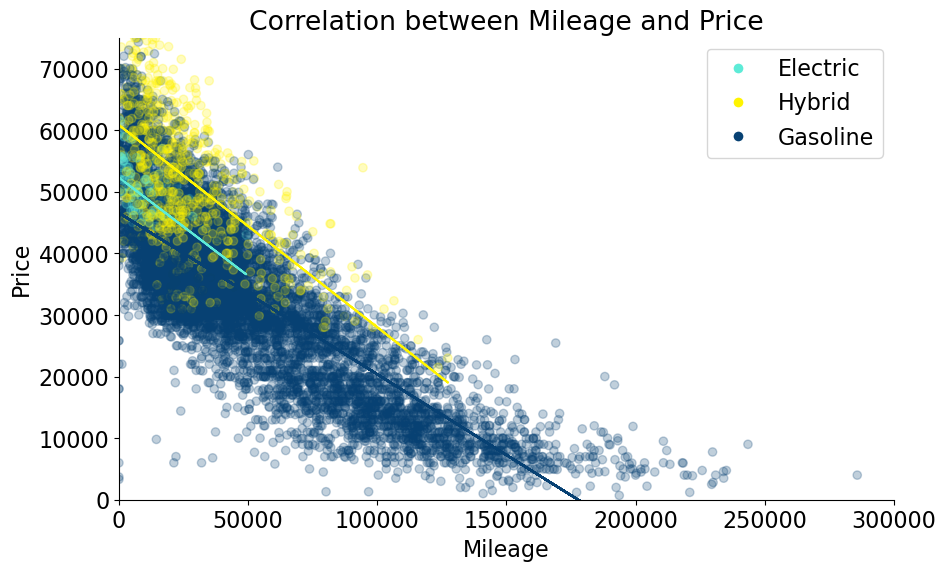

In [52]:
# Define a dictionary mapping fuel types to colors
color_dict = {'Electric': plot_style.hist_color2, 'Hybrid': plot_style.hist_color3, 'Gasoline': plot_style.hist_color}

# Create a scatter plot of mileage vs price, colored by fuel type
plt.scatter(df_volvo['mileage'], df_volvo['price'], c=df_volvo['color'], alpha=0.25)

print(df_volvo['fuel_type'].unique())


# Set the title and labels
plt.title('Correlation between Mileage and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Use plain style for the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()]
plt.legend(handles, color_dict.keys())
plt.xlim(df_volvo['mileage'].clip(0, 300000).min(), df_volvo['mileage'].clip(0, 300000).max())
plt.ylim(0, 75000)
# Display the plot


from scipy.optimize import curve_fit

def model(x, m, b):
    return m * x + b

# Fit a line to the data for each fuel type and plot these lines
for fuel_type, color in color_dict.items():
    df_fuel_type = df_volvo[df_volvo['fuel_type_3cat'] == fuel_type]
    
    # Ensure that 'mileage' and 'price' do not contain any NaN or infinite values
    df_fuel_type = df_fuel_type[np.isfinite(df_fuel_type['mileage']) & np.isfinite(df_fuel_type['price'])]
    
    # Use curve_fit to fit the model to the data
    popt, pcov = curve_fit(model, df_fuel_type['mileage'], df_fuel_type['price'])
    
    # Plot the fitted line
    plt.plot(df_fuel_type['mileage'], model(df_fuel_type['mileage'], *popt), color=color)


plt.show()

In [20]:
df_volvo

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,fuel_type_3cat,color
752062,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription 6 ...,2022,10363.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Crystal White Metallic,...,0.0,1.0,Volvo Cars Arrowhead,2.9,NaN,0.0,4500.0,67998.0,Hybrid,#fff400
752063,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2021,30404.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Gray,...,1.0,1.0,Weston Nissan Volvo Cars,4.8,3.8,14.0,8000.0,49995.0,Hybrid,#fff400
752064,Volvo,XC90 Recharge Plug-In Hybrid T8 EAWD PHEV INSC...,2022,5968.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Crystal White Metallic,...,1.0,0.0,"Volvo Cars Plymouth, A Premier Company",4.7,NaN,0.0,200.0,62700.0,Hybrid,#fff400
752065,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2022,8732.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Blue,...,1.0,1.0,Karp Kia,3.9,NaN,0.0,1500.0,59500.0,Hybrid,#fff400
752066,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2022,9607.0,2.0L I4 16V GDI DOHC Turbo Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Denim Blue Metallic,...,1.0,1.0,LaFontaine Volvo Cars of Farmington Hills,2.8,NaN,0.0,1893.0,72652.0,Hybrid,#fff400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,...,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0,Gasoline,#074173
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,...,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0,Gasoline,#074173
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,...,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0,Gasoline,#074173
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,...,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0,Gasoline,#074173


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?